# Deep Learning - Assignment 10

# Rachit Aggaarwal - M12506500

## Inseriting Libraries

In [33]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Number of inputs

In [3]:
height = 28
width = 28
channels = 1
n_inputs = height * width

## Defining convolution fmaps

In [4]:
conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

In [5]:
conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

In [6]:
pool3_fmaps = conv2_fmaps

## Number of outputs

In [7]:
n_fc1 = 64
n_outputs = 10

## Creating convolution network

In [8]:
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

In [9]:
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

## Activation function as ReLU

In [10]:
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

## Applying Softmax

In [11]:
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

## Training the model

In [12]:
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

## Evaluating Accuracy

In [13]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

## Initializing variables

In [14]:
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

## Importing data

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Number of epochs and batch size

In [16]:
n_epochs = 10
batch_size = 100

## Executing the session

In [17]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.94 Test accuracy: 0.9784
1 Train accuracy: 0.99 Test accuracy: 0.9848
2 Train accuracy: 0.99 Test accuracy: 0.9862
3 Train accuracy: 0.99 Test accuracy: 0.9865
4 Train accuracy: 1.0 Test accuracy: 0.9874
5 Train accuracy: 1.0 Test accuracy: 0.9883
6 Train accuracy: 1.0 Test accuracy: 0.9887
7 Train accuracy: 1.0 Test accuracy: 0.9893
8 Train accuracy: 1.0 Test accuracy: 0.987
9 Train accuracy: 1.0 Test accuracy: 0.9863


## Displaying Features

In [20]:
ker = tf.get_default_graph().get_tensor_by_name("conv1/kernel/Adam:0")
ker.get_shape()

In [23]:
sess = tf.Session()
saver.restore(sess, tf.train.latest_checkpoint("./"))

INFO:tensorflow:Restoring parameters from ./my_mnist_model


In [24]:
features1 = sess.run(ker)

In [26]:
features1[:,:,0,9]

array([[0.00026199, 0.00034895, 0.00069236],
       [0.00049502, 0.0005684 , 0.00104176],
       [0.00103191, 0.00112496, 0.00129789]], dtype=float32)

In [27]:
features1[:,:,0,8]

array([[ 7.3760304e-05,  2.0561261e-04,  1.8165752e-03],
       [ 2.3543785e-04,  1.5062210e-04,  6.7394401e-04],
       [ 6.1056449e-04, -1.3549623e-04, -1.6467379e-04]], dtype=float32)

## Plotting the graph

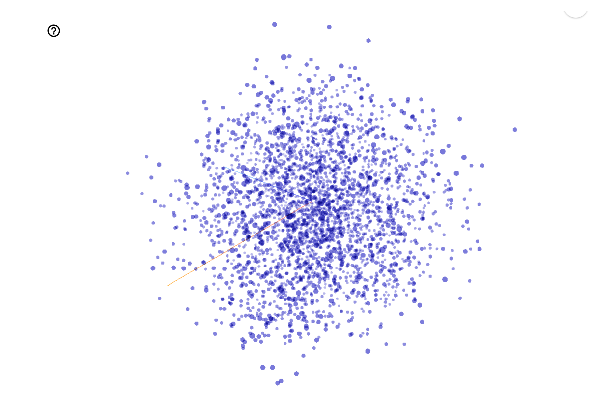

In [34]:
plt.figure(figsize=(10,20))
img = mpimg.imread('C:/Users/rachi/Desktop/' +'graph.png')
plt.imshow(img)
plt.axis("off")
plt.show()